In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
training=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
training.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
training['train_test']=1
test['train_test']=0
combined=pd.concat([training,test])
combined.shape

(2919, 82)

In [6]:
combined.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


In [7]:
training.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,1
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,1
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,1
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,1
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000,1


In [8]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,train_test
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,0
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,0
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,0
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,0
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,0
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,0


In [9]:
#take care of missing data
combined.isnull().sum().sort_values(ascending=False)[:36]

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtUnfSF          1
Exterior2nd        1
Exterior1st        1
TotalBsmtSF        1
Electrical         1
KitchenQual        1
GarageArea         1
BsmtFinSF2         1
SaleType           1
BsmtFinSF1         1
GarageCars         1
RoofMatl           0
dtype: int64

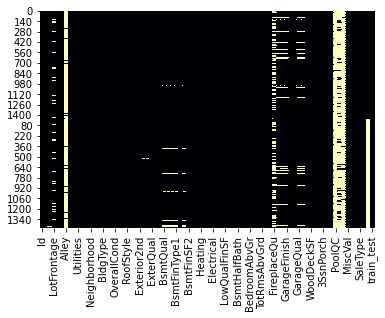

In [10]:
sns.heatmap(combined.isnull(), cbar= False, cmap = 'magma')

In [11]:
# Storing the columns with missing values in a list
Missing_val_col = [col for col in combined.columns if combined[col].isnull().sum() > 1]
Missing_val_col

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SalePrice']

In [12]:
# Checking the percentage of missing values. If any feature has more than 40% missing value then drop that feature. 
for col in Missing_val_col:
    if (combined[col].isnull().sum() > int(0.40 * combined.shape[0])):
        print(col) 

Alley
FireplaceQu
PoolQC
Fence
MiscFeature
SalePrice


In [13]:
#drop these columns
combined.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature','Id'],axis=1, inplace = True)

In [14]:
combined.shape

(2919, 76)

In [15]:
#Checking the numerical features. 
numerical_data = [col for col in combined.columns if combined[col].dtypes != 'O']
combined[numerical_data].head(5)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train_test
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,61,0,0,0,0,0,2,2008,208500.0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,0,0,5,2007,181500.0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,42,0,0,0,0,0,9,2008,223500.0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,35,272,0,0,0,0,2,2006,140000.0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,84,0,0,0,0,0,12,2008,250000.0,1


In [16]:
# Missing value features in numerical type column
numerical_missing = [col for col in numerical_data if combined[col].isnull().sum() > 1 ]
numerical_missing


['LotFrontage',
 'MasVnrArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'SalePrice']

In [17]:
# Checking categorical features and treating missing values in that
category_data = [col for col in combined.columns if combined[col].dtypes == 'O']
combined[category_data].head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [18]:
category_missing = [col for col in category_data if combined[col].isnull().sum() > 1 ]
category_missing

['MSZoning',
 'Utilities',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [19]:
#let's fill the data
combined['LotFrontage'].fillna(combined['LotFrontage'].mean(), inplace = True)
combined['MasVnrArea'].fillna(combined['MasVnrArea'].mode()[0], inplace = True)
combined['GarageYrBlt'].fillna(combined['GarageYrBlt'].mode()[0], inplace = True)
combined['MSZoning'].fillna(combined['MSZoning'].mode()[0], inplace = True)
combined['Utilities'].fillna(combined['Utilities'].mode()[0], inplace = True)
combined['BsmtFullBath'].fillna(combined['BsmtFullBath'].mode()[0], inplace = True)
combined['BsmtHalfBath'].fillna(combined['BsmtHalfBath'].mode()[0], inplace = True)
combined['Functional'].fillna(combined['Functional'].mode()[0], inplace = True)
combined['Electrical'].fillna(combined['Functional'].mode()[0], inplace = True)



combined['TotalBsmtSF'].fillna(combined['TotalBsmtSF'].mode()[0], inplace = True)
combined['GarageArea'].fillna(combined['GarageArea'].mode()[0], inplace = True)
combined['BsmtUnfSF'].fillna(combined['BsmtUnfSF'].mode()[0], inplace = True)
combined['SaleType'].fillna(combined['SaleType'].mode()[0], inplace = True)
combined['Exterior2nd'].fillna(combined['Exterior2nd'].mode()[0], inplace = True)
combined['Exterior1st'].fillna(combined['Exterior1st'].mode()[0], inplace = True)
combined['KitchenQual'].fillna(combined['KitchenQual'].mode()[0], inplace = True)
combined['BsmtFinSF1'].fillna(combined['BsmtFinSF1'].mode()[0], inplace = True)
combined['GarageCars'].fillna(combined['GarageCars'].mode()[0], inplace = True)
combined['BsmtFinSF2'].fillna(combined['BsmtFinSF2'].mode()[0], inplace = True)



In [20]:
# Replacing categorical data with mode
for i in category_missing:
    combined[i].fillna(combined[i].mode()[0], inplace = True)


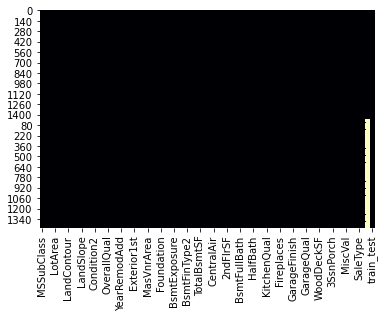

In [21]:
sns.heatmap(combined.isnull(), cbar= False, cmap = 'magma')

In [22]:
combined.isnull().sum().sort_values(ascending=False)[:2]

SalePrice     1459
train_test       0
dtype: int64

In [23]:
df = pd.get_dummies(combined[category_data],
                           columns = category_data,drop_first=True)


In [24]:
df

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1455,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1456,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1457,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [25]:
combined.shape

(2919, 76)

In [26]:
combined=pd.concat([combined,df],axis=1)

In [27]:
combined.shape

(2919, 273)

In [28]:
combined=combined.drop(category_data,axis=1)

In [29]:
combined.shape

(2919, 235)

In [30]:
X_train = combined[combined.train_test == 1].drop(['train_test'], axis =1)
X_test = combined[combined.train_test == 0].drop(['train_test'], axis =1)
y_train = combined[combined.train_test==1].SalePrice

In [31]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
y_pred=classifier.predict(X_test)
basic_output = {'Id': test.Id, 'SalePrice': y_pred}
basic_output=pd.DataFrame(data=basic_output)
basic_output.to_csv('basic_output.csv', index=False)